In [1]:
import sys, os
sys.path = [os.path.dirname(os.getcwd())] + sys.path
print(sys.path)

['/Users/ccoley/rdchiral', '', '/Users/ccoley/rdchiral/test', '/Users/ccoley/ASKCOS/Make-It', '/Users/ccoley/ASKCOS/ASKCOS_Website', '/Users/ccoley/deepchem', '/Users/ccoley/rdchiral/test/\n\nPATH=/opt/local/bin', '/opt/local/sbin', '/Users/ccoley/miniconda3/bin', '/Users/ccoley/miniconda2/bin', '/Usrs/ccoley/deepchem', '/usr/local/bin', '/usr/bin', '/bin', '/usr/sbin', '/sbin', '/Library/TeX/texbin', '/opt/X11/bin', '/usr/local/sbin\n', '/Users/ccoley/miniconda3/envs/askcos_newrdkit/lib/python36.zip', '/Users/ccoley/miniconda3/envs/askcos_newrdkit/lib/python3.6', '/Users/ccoley/miniconda3/envs/askcos_newrdkit/lib/python3.6/lib-dynload', '/Users/ccoley/miniconda3/envs/askcos_newrdkit/lib/python3.6/site-packages', '/Users/ccoley/miniconda3/envs/askcos_newrdkit/lib/python3.6/site-packages/IPython/extensions', '/Users/ccoley/.ipython']


In [2]:
import rdkit
import rdkit.Chem as Chem
import rdkit.Chem.AllChem as AllChem
print(rdkit.rdBase.rdkitVersion)
from rdkit.Chem import AllChem

2018.09.1


In [3]:
import rdchiral
print(rdchiral.__path__)
from rdchiral.main import rdchiralRun, rdchiralRunText, rdchiralReaction, rdchiralReactants

['/Users/ccoley/rdchiral/rdchiral']


In [4]:
def sep_bar():
    print('')
    for i in range(3):
        print('='*80)
    print('')

In [5]:
from rdkit.Chem.Draw import IPythonConsole 
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions 

Validated rxn without errors
Added 0 map nums to unmapped reactants
bond dirs by mapnum
{}
{}
Looking at initializing template frag
All bond specs for this template:
[]
Initialized reactants, assigned map numbers, stereochem, flagpossiblestereocenters
Initialized reactants, assigned map numbers, stereochem, flagpossiblestereocenters
Using naive RunReactants, 1 outcomes
Processing ['COC[CH2:6][CH2:5][O:4][C:2]([CH3:1])=[O:3]']
Added 1 map numbers to product
atom 7 is achiral & achiral -> match
atom 8 is achiral & achiral -> match
Chirality matches! Just checked with atom_chirality_matches
Converted all outcomes to single molecules
No missing bonds
Atom 7 could not have been chiral in reactant template
Atom {} also could not have been chiral in product template 7
...so, copy chirality from reactant instead
New chiral tag CHI_UNSPECIFIED
Atom 8 could not have been chiral in reactant template
Atom {} also could not have been chiral in product template 8
...so, copy chirality from reactant 

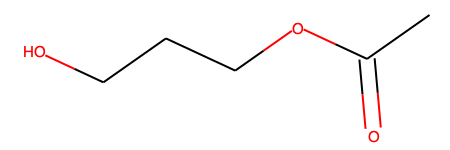

Input SMILES: CC(=O)OCCCO


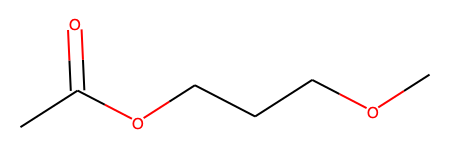

1 RDKit outcomes: COCCCOC(C)=O


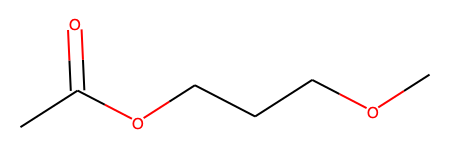

1 RDChiral outcomes: COCCCOC(C)=O


In [6]:
reaction_smarts = '[C:1][OH:2]>>[C:1][O:2][C]'
reactant_smiles = 'CC(=O)OCCCO'
def show_outcomes(reaction_smarts, reactant_smiles):
    
    # normal version
    outcomes_rdkit_mol = AllChem.ReactionFromSmarts(reaction_smarts).RunReactants((Chem.MolFromSmiles(reactant_smiles),))
    outcomes_rdkit = set()
    for outcome in outcomes_rdkit_mol:
        outcomes_rdkit.add('.'.join(sorted([Chem.MolToSmiles(x) for x in outcome])))
    # rdchiral version
    outcomes_rdchiral = rdchiralRunText(reaction_smarts, reactant_smiles)
    
    print('Reaction SMARTS: {}'.format(reaction_smarts))
    display(Chem.MolFromSmiles(reactant_smiles))
    print('Input SMILES: {}'.format(reactant_smiles))
    
    if outcomes_rdkit:
        display(Chem.MolFromSmiles('.'.join(outcomes_rdkit)))
    print('{:1d} RDKit outcomes: {}'.format(len(outcomes_rdkit),'.'.join(outcomes_rdkit)))
    
    if outcomes_rdkit:
        display(Chem.MolFromSmiles('.'.join(outcomes_rdchiral)))
    print('{:1d} RDChiral outcomes: {}'.format(len(outcomes_rdchiral),'.'.join(outcomes_rdchiral)))
    
show_outcomes(reaction_smarts, reactant_smiles)

# Testing rdchiral and template extraction

This notebook looks at the performance of rdchiral in a number of cases where chirality is tricky to handle. There are many complications due to the many ways to write the same molecule.

Num unique? 1


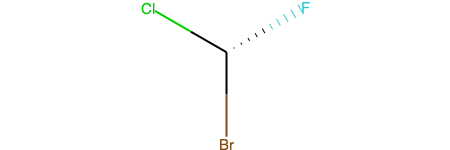

In [7]:
mols = [Chem.MolFromSmiles(x) for x in [
    'F[C@H](Br)Cl',
    'F[C@@H](Cl)Br',
    'Br[C@@H](F)Cl',
    'Br[C@H](Cl)F',
    'Cl[C@H](F)Br',
    'Cl[C@@H](Br)F'
]]

print('Num unique? {}'.format(len(set([Chem.MolToSmiles(mol, True) for mol in mols]))))
display(mols[0])

Num unique? 1


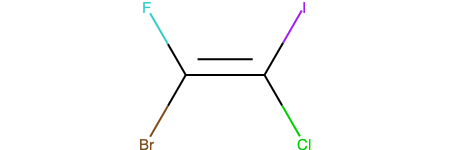

In [8]:
mols = [Chem.MolFromSmiles(x) for x in [
    'F/C(Br)=C(/Cl)I',
    'F/C(Br)=C(Cl)\\I',
    'FC(/Br)=C(/Cl)I',
    'F\\C(Br)=C(\\Cl)I',
    'BrC(/F)=C(\\Cl)I',
    'BrC(/F)=C(Cl)/I',
]]

print('Num unique? {}'.format(len(set([Chem.MolToSmiles(mol, True) for mol in mols]))))
display(mols[0])

# Testing achiral transformations with achiral molecules

If our template is achiral and our molecule is too, we should get the same results as using the standard RDKit RunReactants

Validated rxn without errors
Added 0 map nums to unmapped reactants
bond dirs by mapnum
{}
{}
Looking at initializing template frag
All bond specs for this template:
[]
Initialized reactants, assigned map numbers, stereochem, flagpossiblestereocenters
Initialized reactants, assigned map numbers, stereochem, flagpossiblestereocenters
Using naive RunReactants, 1 outcomes
Processing ['CCOC(=O)[CH2:4][CH2:5][CH2:6][CH2:7][CH2:8][CH3:9]']
Added 2 map numbers to product
atom 2 is achiral & achiral -> match
atom 3 is achiral & achiral -> match
atom 1 is achiral & achiral -> match
Chirality matches! Just checked with atom_chirality_matches
Converted all outcomes to single molecules
No missing bonds
Atom 2 could not have been chiral in reactant template
Atom {} also could not have been chiral in product template 2
...so, copy chirality from reactant instead
New chiral tag CHI_UNSPECIFIED
Atom 3 could not have been chiral in reactant template
Atom {} also could not have been chiral in product te

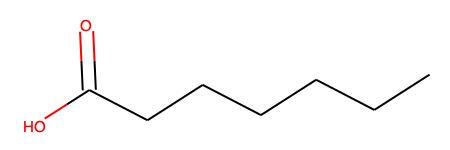

Input SMILES: OC(=O)CCCCCC


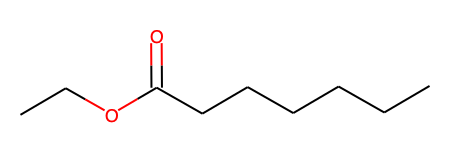

1 RDKit outcomes: CCCCCCC(=O)OCC


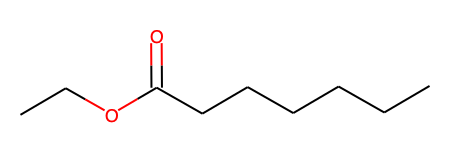

1 RDChiral outcomes: CCCCCCC(=O)OCC


In [9]:
# Preparing a carboxylic acid from hydrolysis of an ethyl ester
reaction_smarts = '[C:1](=[O:3])[OH:2]>>[C:1](=[O:3])[O:2]CC'
reactant_smiles = 'OC(=O)CCCCCC'
show_outcomes(reaction_smarts, reactant_smiles)

# Testing achiral transformations with chiral molecules (not in template)

When applying a transformation expecting an achiral reaction center to a molecule with specified chirality that does not overlap with the template, we should always preserve that chirality exactly. Even if the CIP priority of a branch from a tetrahedral center changes, the orientation stay the same.

Validated rxn without errors
Added 0 map nums to unmapped reactants
bond dirs by mapnum
{}
{}
Looking at initializing template frag
All bond specs for this template:
[]
Initialized reactants, assigned map numbers, stereochem, flagpossiblestereocenters
Initialized reactants, assigned map numbers, stereochem, flagpossiblestereocenters
Using naive RunReactants, 1 outcomes
Processing ['CCOC(=O)[CH2:4][CH2:5][CH2:6][CH2:7][CH:8]([Cl:9])[CH3:10]']
Added 2 map numbers to product
atom 2 is achiral & achiral -> match
atom 3 is achiral & achiral -> match
atom 1 is achiral & achiral -> match
Chirality matches! Just checked with atom_chirality_matches
Converted all outcomes to single molecules
No missing bonds
Atom 2 could not have been chiral in reactant template
Atom {} also could not have been chiral in product template 2
...so, copy chirality from reactant instead
New chiral tag CHI_UNSPECIFIED
Atom 3 could not have been chiral in reactant template
Atom {} also could not have been chiral in pr

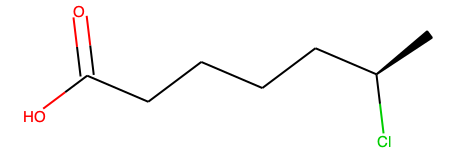

Input SMILES: OC(=O)CCCC[C@H](Cl)C


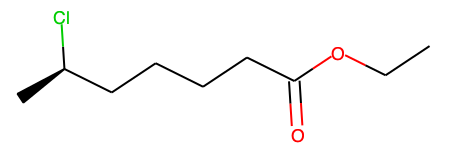

1 RDKit outcomes: CCOC(=O)CCCC[C@@H](C)Cl


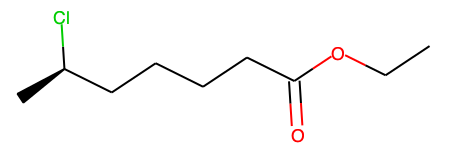

1 RDChiral outcomes: CCOC(=O)CCCC[C@@H](C)Cl


Validated rxn without errors
Added 0 map nums to unmapped reactants
bond dirs by mapnum
{}
{}
Looking at initializing template frag
All bond specs for this template:
[]
Initialized reactants, assigned map numbers, stereochem, flagpossiblestereocenters
Initialized reactants, assigned map numbers, stereochem, flagpossiblestereocenters
Using naive RunReactants, 1 outcomes
Processing ['CCOC(=O)[CH2:4][CH2:5][CH2:6][CH2:7][CH:8]([Cl:9])[CH3:10]']
Added 2 map numbers to product
atom 2 is achiral & achiral -> match
atom 3 is achiral & achiral -> match
atom 1 is achiral & achiral -> match
Chirality matches! Just checked with atom_chirality_matches
Converted all outcomes to single molecules
No missing bonds
Atom 2 could not have been chiral in reactant template
Atom {} also could not have been chiral in product template 2
...so, copy chirality from reactant instead
New chiral tag CHI_UNSPECIFIED
Atom 3 could not have been chiral in reactant templat

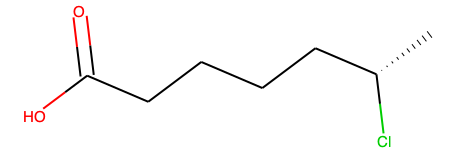

Input SMILES: OC(=O)CCCC[C@@H](Cl)C


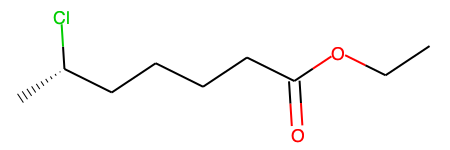

1 RDKit outcomes: CCOC(=O)CCCC[C@H](C)Cl


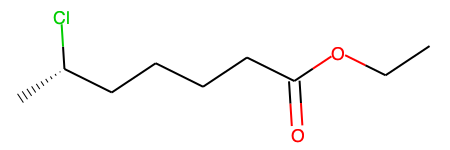

1 RDChiral outcomes: CCOC(=O)CCCC[C@H](C)Cl


Validated rxn without errors
Added 0 map nums to unmapped reactants
bond dirs by mapnum
{}
{}
Looking at initializing template frag
All bond specs for this template:
[]
Initialized reactants, assigned map numbers, stereochem, flagpossiblestereocenters
Initialized reactants, assigned map numbers, stereochem, flagpossiblestereocenters
Using naive RunReactants, 1 outcomes
Processing ['CCOC(=O)[CH2:4][CH:5]([CH2:6][C:7](=[O:8])[O:9][CH3:10])[CH3:11]']
Added 2 map numbers to product
atom 2 is achiral & achiral -> match
atom 3 is achiral & achiral -> match
atom 1 is achiral & achiral -> match
Chirality matches! Just checked with atom_chirality_matches
Converted all outcomes to single molecules
No missing bonds
Atom 2 could not have been chiral in reactant template
Atom {} also could not have been chiral in product template 2
...so, copy chirality from reactant instead
New chiral tag CHI_UNSPECIFIED
Atom 3 could not have been chiral in reactant te

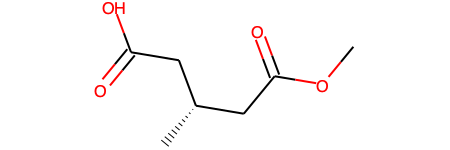

Input SMILES: OC(=O)C[C@H](CC(=O)OC)C


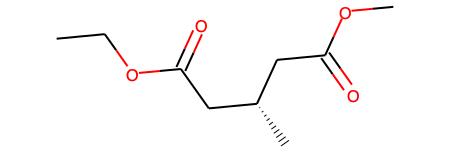

1 RDKit outcomes: CCOC(=O)C[C@@H](C)CC(=O)OC


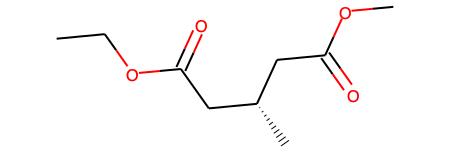

1 RDChiral outcomes: CCOC(=O)C[C@@H](C)CC(=O)OC


Validated rxn without errors
Added 0 map nums to unmapped reactants
bond dirs by mapnum
{}
{}
Looking at initializing template frag
All bond specs for this template:
[]
Initialized reactants, assigned map numbers, stereochem, flagpossiblestereocenters
Initialized reactants, assigned map numbers, stereochem, flagpossiblestereocenters
Using naive RunReactants, 1 outcomes
Processing ['CCOC(=O)[CH2:4][CH:5]([CH2:6][C:7](=[O:8])[O:9][CH2:10][CH2:11][CH3:12])[CH3:13]']
Added 2 map numbers to product
atom 2 is achiral & achiral -> match
atom 3 is achiral & achiral -> match
atom 1 is achiral & achiral -> match
Chirality matches! Just checked with atom_chirality_matches
Converted all outcomes to single molecules
No missing bonds
Atom 2 could not have been chiral in reactant template
Atom {} also could not have been chiral in product template 2
...so, copy chirality from reactant instead
New chiral tag CHI_UNSPECIFIED
Atom 3 could not have been c

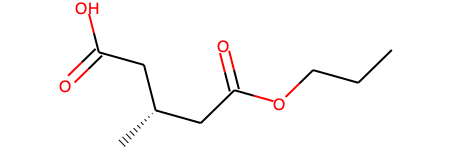

Input SMILES: OC(=O)C[C@H](CC(=O)OCCC)C


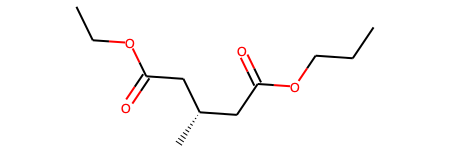

1 RDKit outcomes: CCCOC(=O)C[C@H](C)CC(=O)OCC


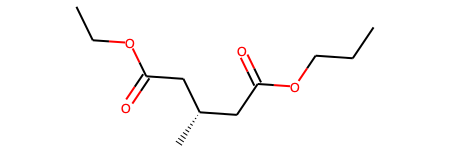

1 RDChiral outcomes: CCCOC(=O)C[C@H](C)CC(=O)OCC


Validated rxn without errors
Added 0 map nums to unmapped reactants
bond dirs by mapnum
{}
{}
Looking at initializing template frag
All bond specs for this template:
[]
Initialized reactants, assigned map numbers, stereochem, flagpossiblestereocenters
Initialized reactants, assigned map numbers, stereochem, flagpossiblestereocenters
Found a double bond with potential cis/trans (based on degree)
6 = 7
Using naive RunReactants, 1 outcomes
Processing ['CCOC(=O)[CH2:4][CH2:5][CH:6]=[C:7]([F:8])[CH3:9]']
Added 2 map numbers to product
atom 2 is achiral & achiral -> match
atom 3 is achiral & achiral -> match
atom 1 is achiral & achiral -> match
Chirality matches! Just checked with atom_chirality_matches
Converted all outcomes to single molecules
No missing bonds
Atom 2 could not have been chiral in reactant template
Atom {} also could not have been chiral in product template 2
...so, copy chirality from reactant instead
New chiral tag CHI_UN

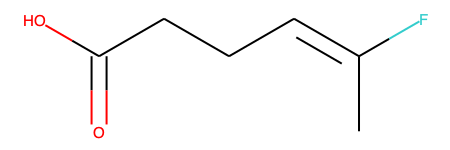

Input SMILES: OC(=O)CC/C=C(F)\C


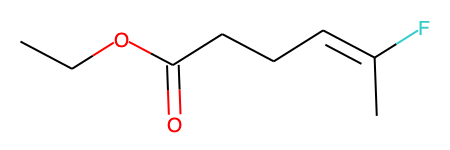

1 RDKit outcomes: CCOC(=O)CC/C=C(\C)F


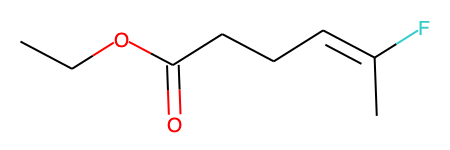

1 RDChiral outcomes: CCOC(=O)CC/C=C(\C)F


Validated rxn without errors
Added 0 map nums to unmapped reactants
bond dirs by mapnum
{}
{}
Looking at initializing template frag
All bond specs for this template:
[]
Initialized reactants, assigned map numbers, stereochem, flagpossiblestereocenters
Initialized reactants, assigned map numbers, stereochem, flagpossiblestereocenters
Found a double bond with potential cis/trans (based on degree)
6 = 7
Using naive RunReactants, 1 outcomes
Processing ['CCOC(=O)[CH2:4][CH2:5][CH:6]=[C:7]([F:8])[CH3:9]']
Added 2 map numbers to product
atom 2 is achiral & achiral -> match
atom 3 is achiral & achiral -> match
atom 1 is achiral & achiral -> match
Chirality matches! Just checked with atom_chirality_matches
Converted all outcomes to single molecules
No missing bonds
Atom 2 could not have been chiral in reactant template
Atom {} also could not have been chiral in product template 2
...so, copy chirality from reactant instead
New chiral tag CHI_UNSPECIFIE

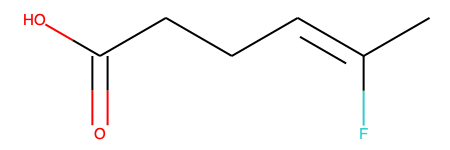

Input SMILES: OC(=O)CC/C=C(F)/C


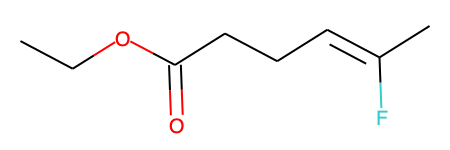

1 RDKit outcomes: CCOC(=O)CC/C=C(/C)F


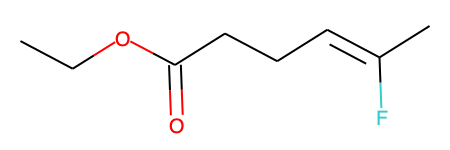

1 RDChiral outcomes: CCOC(=O)CC/C=C(/C)F


In [10]:
# Preparing a carboxylic acid from hydrolysis of an ethyl ester
reaction_smarts = '[C:1](=[O:3])[OH:2]>>[C:1](=[O:3])[O:2]CC'
reactant_smiles = 'OC(=O)CCCC[C@H](Cl)C'
show_outcomes(reaction_smarts, reactant_smiles)
sep_bar()
reactant_smiles = 'OC(=O)CCCC[C@@H](Cl)C'
show_outcomes(reaction_smarts, reactant_smiles)
sep_bar()
reactant_smiles = 'OC(=O)C[C@H](CC(=O)OC)C'
show_outcomes(reaction_smarts, reactant_smiles)
sep_bar()
reactant_smiles = 'OC(=O)C[C@H](CC(=O)OCCC)C'
show_outcomes(reaction_smarts, reactant_smiles)
sep_bar()
reactant_smiles = 'OC(=O)CC/C=C(F)\C'
show_outcomes(reaction_smarts, reactant_smiles)
sep_bar()
reactant_smiles = 'OC(=O)CC/C=C(F)/C'
show_outcomes(reaction_smarts, reactant_smiles)

# Testing achiral transformations with chiral molecules (partially in template, but auxiliary)

When applying a transformation expecting an achiral reaction center to a molecule with specified chirality, we do _not_ want a match *unless* it would be impossible for the template to have specified chirality. For example, a tetrahedral center in a molecule matches part of a template, but that template does not contain all of that atom's neighbors. It would be impossible for the template to constrain the chirality, and thus we are okay matching. That tetrahedral center should be preserved.

Reaction SMARTS: [C:4][C:1](=[O:3])[OH:2]>>[C:4][C:1](=[O:3])[O:2]CC


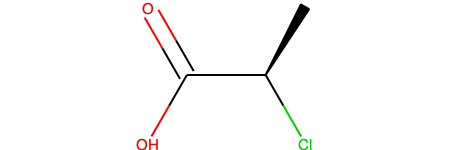

Input SMILES: OC(=O)[C@H](Cl)C


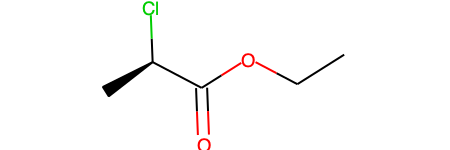

1 RDKit outcomes: CCOC(=O)[C@@H](C)Cl


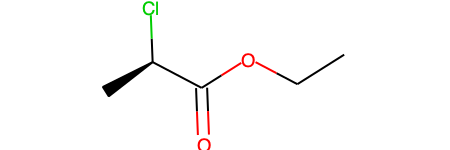

1 RDChiral outcomes: CCOC(=O)[C@@H](C)Cl


Reaction SMARTS: [C:4][C:1](=[O:3])[OH:2]>>[C:4][C:1](=[O:3])[O:2]CC


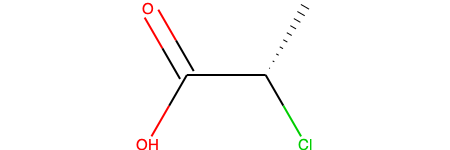

Input SMILES: OC(=O)[C@@H](Cl)C


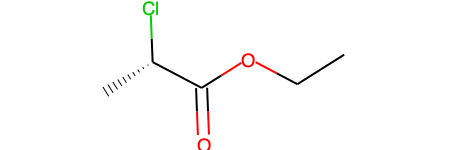

1 RDKit outcomes: CCOC(=O)[C@H](C)Cl


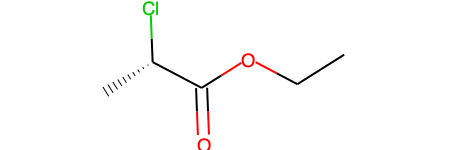

1 RDChiral outcomes: CCOC(=O)[C@H](C)Cl


Reaction SMARTS: [C:4][C:1](=[O:3])[OH:2]>>[C:4][C:1](=[O:3])[O:2]CC


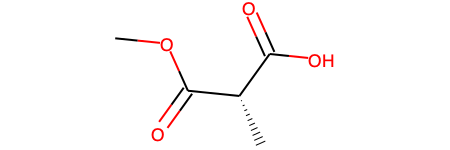

Input SMILES: OC(=O)[C@@H](C(=O)OC)C


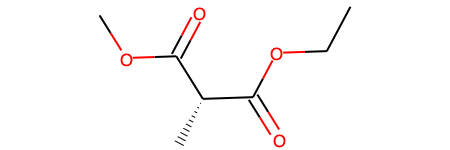

1 RDKit outcomes: CCOC(=O)[C@H](C)C(=O)OC


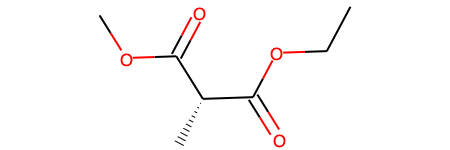

1 RDChiral outcomes: CCOC(=O)[C@H](C)C(=O)OC


Reaction SMARTS: [C:4][C:1](=[O:3])[OH:2]>>[C:4][C:1](=[O:3])[O:2]CC


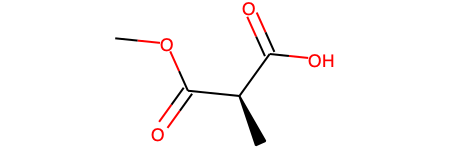

Input SMILES: OC(=O)[C@H](C(=O)OC)C


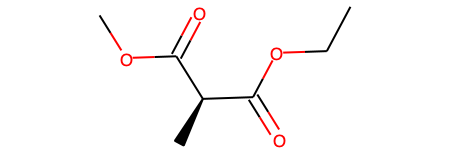

1 RDKit outcomes: CCOC(=O)[C@@H](C)C(=O)OC


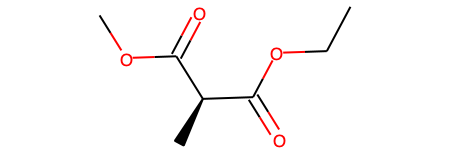

1 RDChiral outcomes: CCOC(=O)[C@@H](C)C(=O)OC


In [20]:
# Preparing a carboxylic acid from hydrolysis of an ethyl ester
reaction_smarts = '[C:4][C:1](=[O:3])[OH:2]>>[C:4][C:1](=[O:3])[O:2]CC'
reactant_smiles = 'OC(=O)[C@H](Cl)C'
show_outcomes(reaction_smarts, reactant_smiles)
sep_bar()
reactant_smiles = 'OC(=O)[C@@H](Cl)C'
show_outcomes(reaction_smarts, reactant_smiles)
sep_bar()
reactant_smiles = 'OC(=O)[C@@H](C(=O)OC)C'
show_outcomes(reaction_smarts, reactant_smiles)
sep_bar()
reactant_smiles = 'OC(=O)[C@H](C(=O)OC)C'
show_outcomes(reaction_smarts, reactant_smiles)

Reaction SMARTS: [CH:1][O:2][C:3]>>[CH:1][OH:2].O[C:3]


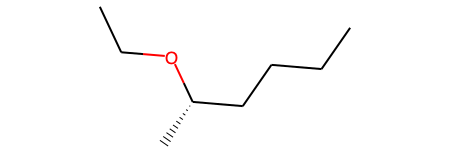

Input SMILES: CCCC[C@@H](OCC)C


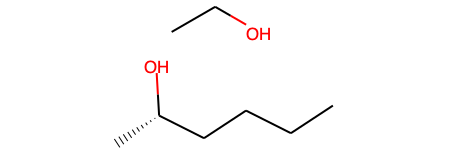

1 RDKit outcomes: CCCC[C@H](C)O.CCO


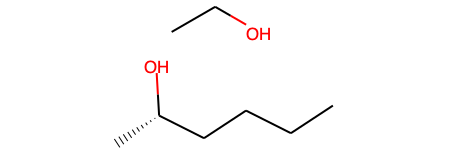

1 RDChiral outcomes: CCCC[C@H](C)O.CCO


Reaction SMARTS: [CH:1][O:2][C:3]>>[CH:1][OH:2].O[C:3]


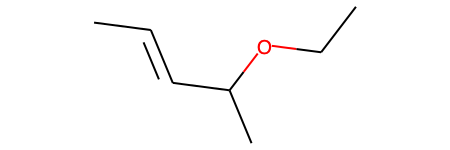

Input SMILES: CC=C/C(OCC)C


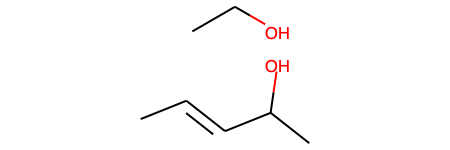

1 RDKit outcomes: CC=CC(C)O.CCO


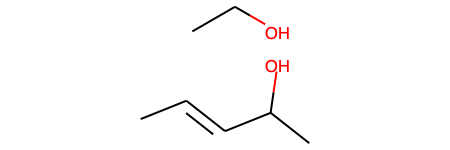

1 RDChiral outcomes: CC=CC(C)O.CCO


In [21]:
# Alkylation reaction with unspecified chirality, template could not have specified
reaction_smarts = '[CH:1][O:2][C:3]>>[CH:1][OH:2].O[C:3]'
reactant_smiles = 'CCCC[C@@H](OCC)C'
show_outcomes(reaction_smarts, reactant_smiles)
sep_bar()
reactant_smiles = 'CC=C/C(OCC)C'
show_outcomes(reaction_smarts, reactant_smiles)

Reaction SMARTS: [*:4][C:1]([*:5])[O:2][C:3]>>[*:4][C:1]([*:5])[OH:2].O[C:3]


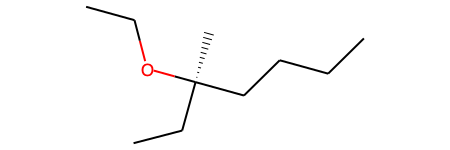

Input SMILES: CCCC[C@@](CC)(OCC)C


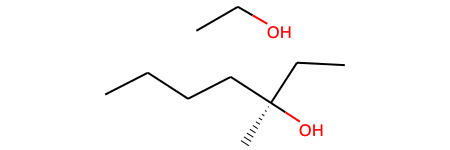

1 RDKit outcomes: CCCC[C@](C)(O)CC.CCO


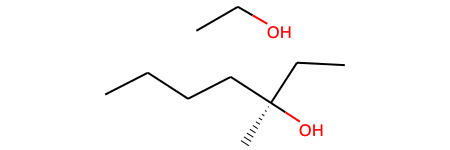

1 RDChiral outcomes: CCCC[C@](C)(O)CC.CCO


In [22]:
# Alkylation reaction with unspecified chirality, template could not have specified due to symmetry
reaction_smarts = '[*:4][C:1]([*:5])[O:2][C:3]>>[*:4][C:1]([*:5])[OH:2].O[C:3]'
reactant_smiles = 'CCCC[C@@](CC)(OCC)C'
show_outcomes(reaction_smarts, reactant_smiles)

Reaction SMARTS: [OH:1][CH:2]=[C:3]>>CC[O:1][CH:2]=[C:3]


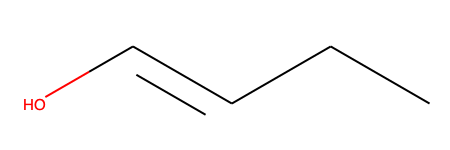

Input SMILES: O/C=C/CC


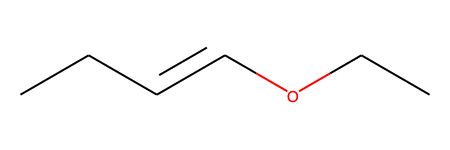

1 RDKit outcomes: CCC=COCC


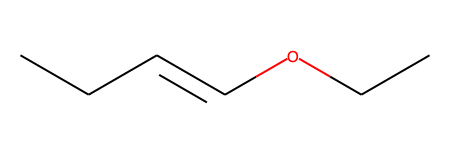

1 RDChiral outcomes: CC/C=C/OCC


In [23]:
reaction_smarts = '[OH:1][CH:2]=[C:3]>>CC[O:1][CH:2]=[C:3]'
reactant_smiles = 'O/C=C/CC'
show_outcomes(reaction_smarts, reactant_smiles)

# Testing achiral transformations with chiral molecules (fully in template)

When applying a transformation expecting an achiral reaction center to a molecule with specified chirality, we do _not_ want a match. Generating a retrosynthetic suggestion in this situation would falsely imply that the transformation could be performed stereoselectively.

Reaction SMARTS: [C:1][CH:2]([CH3:3])[O:4][C:5]>>[C:1][CH:2]([CH3:3])[OH:4].O[C:5]


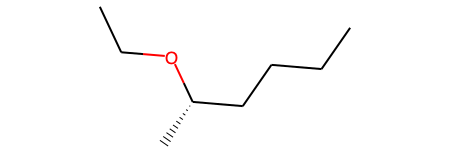

Input SMILES: CCCC[C@@H](OCC)C


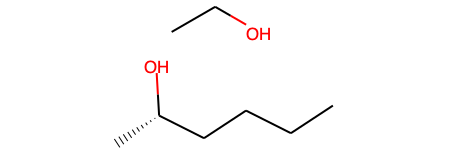

1 RDKit outcomes: CCCC[C@H](C)O.CCO


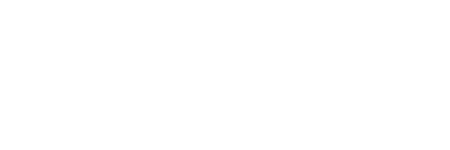

0 RDChiral outcomes: 


In [24]:
# Alkylation reaction with unspecified chirality, template could have specified
reaction_smarts = '[C:1][CH:2]([CH3:3])[O:4][C:5]>>[C:1][CH:2]([CH3:3])[OH:4].O[C:5]'
reactant_smiles = 'CCCC[C@@H](OCC)C'
show_outcomes(reaction_smarts, reactant_smiles)

Reaction SMARTS: [CH:1]([CH3:2])=[CH:3]([CH2:4][O:5][C:6])>>[CH:1]([CH3:2])=[CH:3][CH2:4][OH:5].O[C:6]


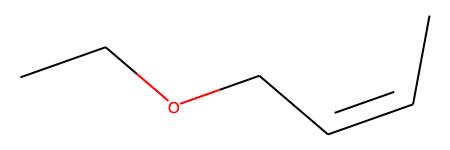

Input SMILES: C(\C)=C\COCC


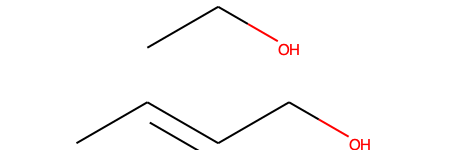

1 RDKit outcomes: CC=CCO.CCO


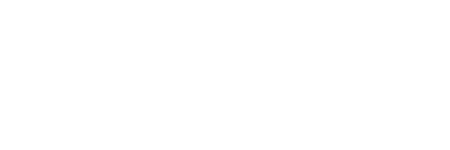

0 RDChiral outcomes: 


In [25]:
# Etherification reaction with unspecified chirality, template could have specified
reaction_smarts = '[CH:1]([CH3:2])=[CH:3]([CH2:4][O:5][C:6])>>[CH:1]([CH3:2])=[CH:3][CH2:4][OH:5].O[C:6]'
reactant_smiles = 'C(\C)=C\COCC'
show_outcomes(reaction_smarts, reactant_smiles)

Reaction SMARTS: [C:1][CH:2]([CH3:3])[O:4][C:5]>>[C:1][CH:2]([CH3:3])[OH:4].O[C:5]


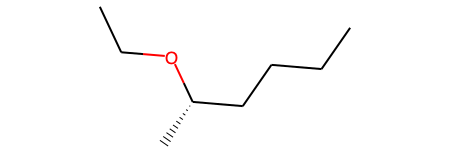

Input SMILES: CCCC[C@@H](OCC)C


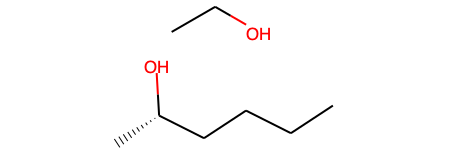

1 RDKit outcomes: CCCC[C@H](C)O.CCO


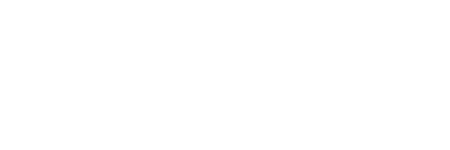

0 RDChiral outcomes: 


In [26]:
# Etherification reaction with unspecified chirality, template could have specified
reaction_smarts = '[C:1][CH:2]([CH3:3])[O:4][C:5]>>[C:1][CH:2]([CH3:3])[OH:4].O[C:5]'
reactant_smiles = 'CCCC[C@@H](OCC)C'
show_outcomes(reaction_smarts, reactant_smiles)

# Testing chiral transformations with achiral molecules

When the transformation expects a chiral reaction center but the input molecule is achiral, the template should not apply. In the retrosynthetic direction, this means that a stereospecific reaction should not be suggested as a way of synthesizing a racemic product.

Validated rxn without errors
Added 0 map nums to unmapped reactants
bond dirs by mapnum
{}
{}
Looking at initializing template frag
All bond specs for this template:
[]
Initialized reactants, assigned map numbers, stereochem, flagpossiblestereocenters
Initialized reactants, assigned map numbers, stereochem, flagpossiblestereocenters
Using naive RunReactants, 1 outcomes
Processing ['CC(Br)C[CH2:3][CH2:2][CH3:1]']
Added 1 map numbers to product
atom 4 is achiral & achiral -> match
atom 5 is achiral in mol, but specified in template
Chirality violated! Should not have gotten this match
Reaction SMARTS: [C:1][C@H:2]([CH3:3])[I:4]>>[C:1][C@@H:2]([CH3:3])Br


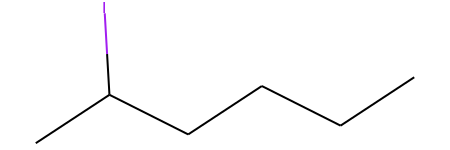

Input SMILES: CCCCC(I)C


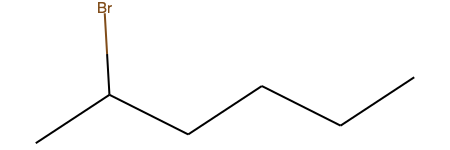

1 RDKit outcomes: CCCCC(C)Br


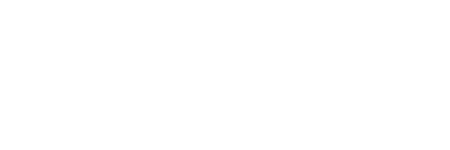

0 RDChiral outcomes: 


In [11]:
# SN2 with inversion of a tetrahedral center
reaction_smarts = '[C:1][C@H:2]([CH3:3])[I:4]>>[C:1][C@@H:2]([CH3:3])Br'
reactant_smiles = 'CCCCC(I)C'
show_outcomes(reaction_smarts, reactant_smiles)

Validated rxn without errors
Added 0 map nums to unmapped reactants
bond dirs by mapnum
{(1, 2): rdkit.Chem.rdchem.BondDir.ENDUPRIGHT, (2, 1): rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT, (3, 4): rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT, (4, 3): rdkit.Chem.rdchem.BondDir.ENDUPRIGHT}
{}
Looking at initializing template frag
Found a double bond with potential cis/trans (based on degree)
2 = 3
Front specification: ENDUPRIGHT
Back specification: ENDDOWNRIGHT
--> locally CIS
All bond specs for this template:
[((1, 2, 3, 4), (rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT, rdkit.Chem.rdchem.BondDir.ENDUPRIGHT)), ((2, 1, 3, 4), (rdkit.Chem.rdchem.BondDir.ENDUPRIGHT, rdkit.Chem.rdchem.BondDir.ENDUPRIGHT)), ((1, 2, 4, 3), (rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT, rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT)), ((2, 1, 4, 3), (rdkit.Chem.rdchem.BondDir.ENDUPRIGHT, rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT)), ((3, 4, 1, 2), (rdkit.Chem.rdchem.BondDir.ENDUPRIGHT, rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT)), ((3, 4, 2, 1), (r

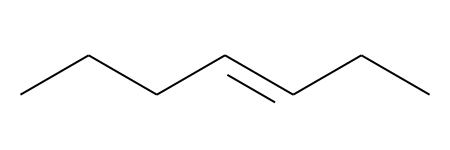

Input SMILES: CCCC=CCC


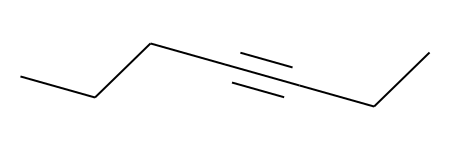

1 RDKit outcomes: CCC#CCCC


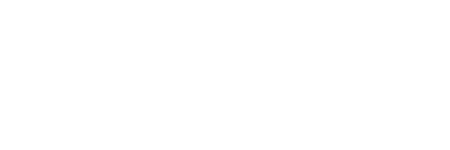

0 RDChiral outcomes: 


In [12]:
# Prepare a cis alkene from an alkyne
reaction_smarts = '[C:1]/[CH:2]=[CH:3]\[C:4]>>[C:1][C:2]#[C:3][C:4]'
reactant_smiles = 'CCCC=CCC'
show_outcomes(reaction_smarts, reactant_smiles)

# Testing chiral transformations with chiral molecules

Here is where the cases get particularly tricky. They've been broken into a number of subsections depending on the type of transformation.

### Reaction expects cis double bond

#### Molecule has explicit cis double bond

Validated rxn without errors
Added 0 map nums to unmapped reactants
bond dirs by mapnum
{(1, 2): rdkit.Chem.rdchem.BondDir.ENDUPRIGHT, (2, 1): rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT, (3, 4): rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT, (4, 3): rdkit.Chem.rdchem.BondDir.ENDUPRIGHT}
{}
Looking at initializing template frag
Found a double bond with potential cis/trans (based on degree)
2 = 3
Front specification: ENDUPRIGHT
Back specification: ENDDOWNRIGHT
--> locally CIS
All bond specs for this template:
[((1, 2, 3, 4), (rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT, rdkit.Chem.rdchem.BondDir.ENDUPRIGHT)), ((2, 1, 3, 4), (rdkit.Chem.rdchem.BondDir.ENDUPRIGHT, rdkit.Chem.rdchem.BondDir.ENDUPRIGHT)), ((1, 2, 4, 3), (rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT, rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT)), ((2, 1, 4, 3), (rdkit.Chem.rdchem.BondDir.ENDUPRIGHT, rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT)), ((3, 4, 1, 2), (rdkit.Chem.rdchem.BondDir.ENDUPRIGHT, rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT)), ((3, 4, 2, 1), (r

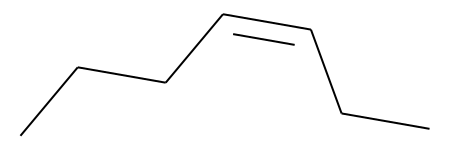

Input SMILES: CCC/C=C\CC


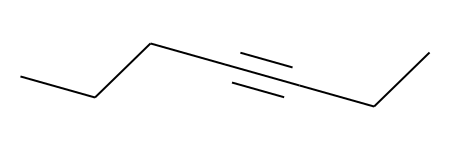

1 RDKit outcomes: CCC#CCCC


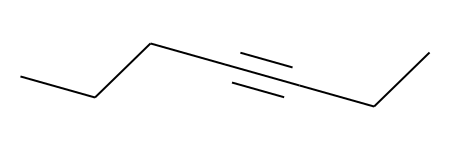

1 RDChiral outcomes: CCC#CCCC


Validated rxn without errors
Added 0 map nums to unmapped reactants
bond dirs by mapnum
{(1, 2): rdkit.Chem.rdchem.BondDir.ENDUPRIGHT, (2, 1): rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT, (3, 4): rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT, (4, 3): rdkit.Chem.rdchem.BondDir.ENDUPRIGHT}
{}
Looking at initializing template frag
Found a double bond with potential cis/trans (based on degree)
2 = 3
Front specification: ENDUPRIGHT
Back specification: ENDDOWNRIGHT
--> locally CIS
All bond specs for this template:
[((1, 2, 3, 4), (rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT, rdkit.Chem.rdchem.BondDir.ENDUPRIGHT)), ((2, 1, 3, 4), (rdkit.Chem.rdchem.BondDir.ENDUPRIGHT, rdkit.Chem.rdchem.BondDir.ENDUPRIGHT)), ((1, 2, 4, 3), (rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT, rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT)), ((2, 1, 4, 3), (rdkit.Chem.rdchem.BondDir.ENDUPRIGHT, rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT)), ((3, 4, 1, 2), (rdkit.Chem.rdchem.BondDir.ENDUPRIGHT, rdkit.Chem.rdchem.BondDir.E

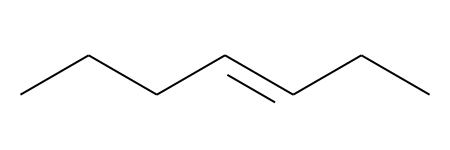

Input SMILES: CCC/C=C/CC


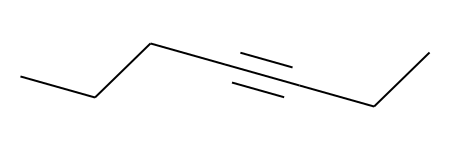

1 RDKit outcomes: CCC#CCCC


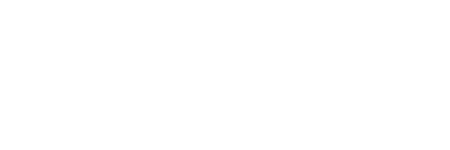

0 RDChiral outcomes: 


In [13]:
# Prepare a cis alkene from an alkyne
reaction_smarts = '[C:1]/[CH:2]=[CH:3]\[C:4]>>[C:1][C:2]#[C:3][C:4]'
reactant_smiles = 'CCC/C=C\CC' # explicit cis
show_outcomes(reaction_smarts, reactant_smiles)
sep_bar()
reactant_smiles = 'CCC/C=C/CC' # explicit trans
show_outcomes(reaction_smarts, reactant_smiles)

#### Molecule has an implicit double bond inside a ring

Validated rxn without errors
Added 0 map nums to unmapped reactants
bond dirs by mapnum
{(1, 2): rdkit.Chem.rdchem.BondDir.ENDUPRIGHT, (2, 1): rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT, (3, 4): rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT, (4, 3): rdkit.Chem.rdchem.BondDir.ENDUPRIGHT}
{}
Looking at initializing template frag
Found a double bond with potential cis/trans (based on degree)
2 = 3
Front specification: ENDUPRIGHT
Back specification: ENDDOWNRIGHT
--> locally CIS
All bond specs for this template:
[((1, 2, 3, 4), (rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT, rdkit.Chem.rdchem.BondDir.ENDUPRIGHT)), ((2, 1, 3, 4), (rdkit.Chem.rdchem.BondDir.ENDUPRIGHT, rdkit.Chem.rdchem.BondDir.ENDUPRIGHT)), ((1, 2, 4, 3), (rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT, rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT)), ((2, 1, 4, 3), (rdkit.Chem.rdchem.BondDir.ENDUPRIGHT, rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT)), ((3, 4, 1, 2), (rdkit.Chem.rdchem.BondDir.ENDUPRIGHT, rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT)), ((3, 4, 2, 1), (r

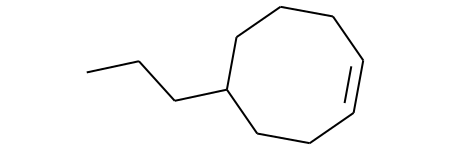

Input SMILES: C1(CCC)CCCC=CCC1


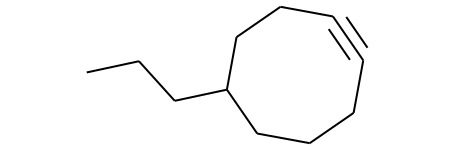

1 RDKit outcomes: CCCC1CCC#CCCC1


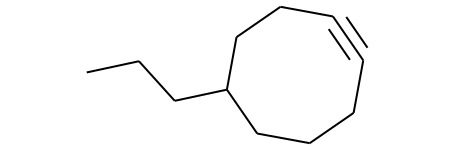

1 RDChiral outcomes: CCCC1CCC#CCCC1


In [14]:
# Prepare a cis alkene from an alkyne
reaction_smarts = '[C:1]/[CH:2]=[CH:3]\[C:4]>>[C:1][C:2]#[C:3][C:4]'
reactant_smiles = 'C1(CCC)CCCC=CCC1' # implicit cis
show_outcomes(reaction_smarts, reactant_smiles)

### Reaction expects trans double bond

Validated rxn without errors
Added 0 map nums to unmapped reactants
bond dirs by mapnum
{(1, 2): rdkit.Chem.rdchem.BondDir.ENDUPRIGHT, (2, 1): rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT, (3, 4): rdkit.Chem.rdchem.BondDir.ENDUPRIGHT, (4, 3): rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT}
{}
Looking at initializing template frag
Found a double bond with potential cis/trans (based on degree)
2 = 3
Front specification: ENDUPRIGHT
Back specification: ENDUPRIGHT
-> locally TRANS
All bond specs for this template:
[((1, 2, 3, 4), (rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT, rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT)), ((2, 1, 3, 4), (rdkit.Chem.rdchem.BondDir.ENDUPRIGHT, rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT)), ((1, 2, 4, 3), (rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT, rdkit.Chem.rdchem.BondDir.ENDUPRIGHT)), ((2, 1, 4, 3), (rdkit.Chem.rdchem.BondDir.ENDUPRIGHT, rdkit.Chem.rdchem.BondDir.ENDUPRIGHT)), ((3, 4, 1, 2), (rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT, rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT)), ((3, 4, 2, 1), (

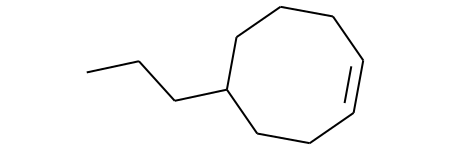

Input SMILES: C1(CCC)CCCC=CCC1


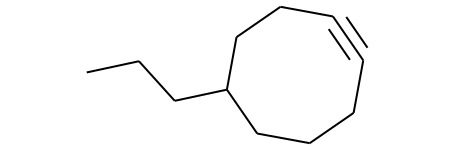

1 RDKit outcomes: CCCC1CCC#CCCC1


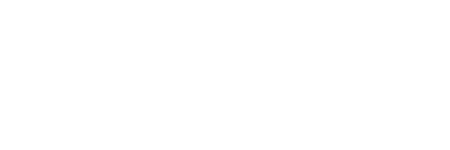

0 RDChiral outcomes: 


Validated rxn without errors
Added 0 map nums to unmapped reactants
bond dirs by mapnum
{(1, 2): rdkit.Chem.rdchem.BondDir.ENDUPRIGHT, (2, 1): rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT, (3, 4): rdkit.Chem.rdchem.BondDir.ENDUPRIGHT, (4, 3): rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT}
{}
Looking at initializing template frag
Found a double bond with potential cis/trans (based on degree)
2 = 3
Front specification: ENDUPRIGHT
Back specification: ENDUPRIGHT
-> locally TRANS
All bond specs for this template:
[((1, 2, 3, 4), (rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT, rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT)), ((2, 1, 3, 4), (rdkit.Chem.rdchem.BondDir.ENDUPRIGHT, rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT)), ((1, 2, 4, 3), (rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT, rdkit.Chem.rdchem.BondDir.ENDUPRIGHT)), ((2, 1, 4, 3), (rdkit.Chem.rdchem.BondDir.ENDUPRIGHT, rdkit.Chem.rdchem.BondDir.ENDUPRIGHT)), ((3, 4, 1, 2), (rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT, rdkit.Chem.rdchem.BondDir.ENDDOWNR

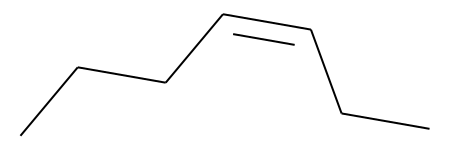

Input SMILES: CCC/C=C\CC


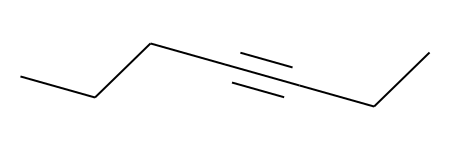

1 RDKit outcomes: CCC#CCCC


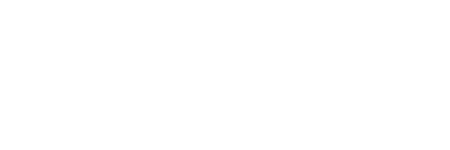

0 RDChiral outcomes: 


Validated rxn without errors
Added 0 map nums to unmapped reactants
bond dirs by mapnum
{(1, 2): rdkit.Chem.rdchem.BondDir.ENDUPRIGHT, (2, 1): rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT, (3, 4): rdkit.Chem.rdchem.BondDir.ENDUPRIGHT, (4, 3): rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT}
{}
Looking at initializing template frag
Found a double bond with potential cis/trans (based on degree)
2 = 3
Front specification: ENDUPRIGHT
Back specification: ENDUPRIGHT
-> locally TRANS
All bond specs for this template:
[((1, 2, 3, 4), (rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT, rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT)), ((2, 1, 3, 4), (rdkit.Chem.rdchem.BondDir.ENDUPRIGHT, rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT)), ((1, 2, 4, 3), (rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT, rdkit.Chem.rdchem.BondDir.ENDUPRIGHT)), ((2, 1, 4, 3), (rdkit.Chem.rdchem.BondDir.ENDUPRIGHT, rdkit.Chem.rdchem.BondDir.ENDUPRIGHT)), ((3, 4, 1, 2), (rdkit.Chem.rdchem.BondDir.ENDDOWNRIGHT, rdkit.Chem.rdchem.BondDir.ENDDOWNR

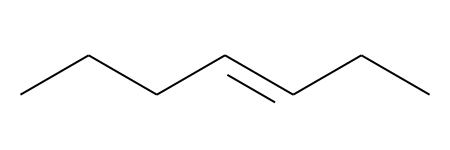

Input SMILES: CCC/C=C/CC


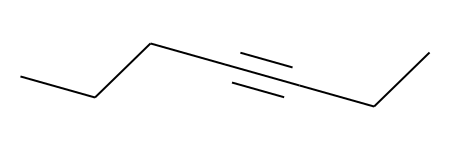

1 RDKit outcomes: CCC#CCCC


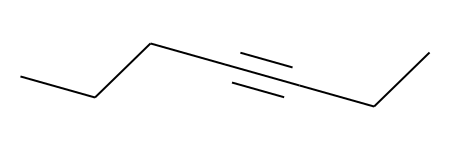

1 RDChiral outcomes: CCC#CCCC


In [15]:
# Prepare a trans alkene from an alkyne
reaction_smarts = '[C:1]/[CH:2]=[CH:3]/[C:4]>>[C:1][C:2]#[C:3][C:4]'
reactant_smiles = 'C1(CCC)CCCC=CCC1' # implicit cis
show_outcomes(reaction_smarts, reactant_smiles)
sep_bar()
reactant_smiles = 'CCC/C=C\CC' # explicit cis
show_outcomes(reaction_smarts, reactant_smiles)
sep_bar()
reactant_smiles = 'CCC/C=C/CC' # explicit trans
show_outcomes(reaction_smarts, reactant_smiles)

### Reaction expects tetrahedral center

#### ...that will be inverted

In [16]:
# SN2 with inversion of a tetrahedral center
reaction_smarts = '[C:1][C@H:2]([CH3:3])[I:4]>>[C:1][C@@H:2]([CH3:3])Br'
reactant_smiles = 'CCCC[C@@H](I)C'
show_outcomes(reaction_smarts, reactant_smiles)
sep_bar()
reaction_smarts = '[C:1][C@H:2]([CH3:3])[I:4]>>[C:1][C@H:2](Br)[CH3:3]'
reactant_smiles = 'CCCC[C@@H](I)C'
show_outcomes(reaction_smarts, reactant_smiles)
sep_bar()
reaction_smarts = '[C:1][C@@H:2]([CH3:3])[I:4]>>[C:1][C@@H:2](Br)[CH3:3]'
reactant_smiles = 'CCCC[C@@H](I)C'
show_outcomes(reaction_smarts, reactant_smiles)

Validated rxn without errors
Added 0 map nums to unmapped reactants
bond dirs by mapnum
{}
{}
Looking at initializing template frag
All bond specs for this template:
[]
Initialized reactants, assigned map numbers, stereochem, flagpossiblestereocenters
Initialized reactants, assigned map numbers, stereochem, flagpossiblestereocenters
Using naive RunReactants, 1 outcomes
Processing ['CC(Br)C[CH2:3][CH2:2][CH3:1]']
Added 1 map numbers to product
atom 4 is achiral & achiral -> match
[4, 7, 4, -1]
[4, 6, 7, -1]
CHI_TETRAHEDRAL_CCW
CHI_TETRAHEDRAL_CW
{'molAtomMapNumber': 5, '__computedProps': <rdkit.rdBase._vectNSt3__112basic_stringIcNS_11char_traitsIcEENS_9allocatorIcEEEE object at 0x119fbe2d0>, '_CIPRank': 1, '_CIPCode': 'R', 'tetra_possible': True}
{'__computedProps': <rdkit.rdBase._vectNSt3__112basic_stringIcNS_11char_traitsIcEENS_9allocatorIcEEEE object at 0x119fbe2d0>, '_CIPRank': 5, '_ChiralityPossible': 1, '_CIPCode': 'S', 'molAtomMapNumber': 5}
CHI_TETRAHEDRAL_CCW
CHI_TETRAHEDRAL_CW

KeyError: 'Pop from empty set - this should not happen!'

#### ...that will be preserved
In retro direction, this reaction is stereoretentive

Reaction SMARTS: [C:1][C@H:2]([CH3:3])[I:4]>>[C:1][C@H:2]([CH3:3])Br


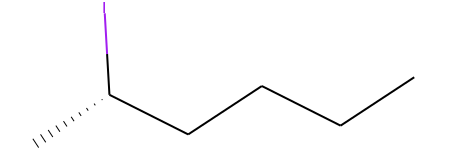

Input SMILES: CCCC[C@@H](I)C


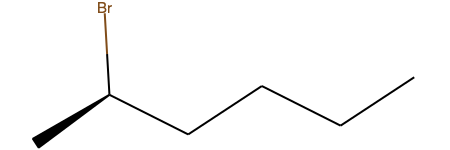

1 RDKit outcomes: CCCC[C@@H](C)Br


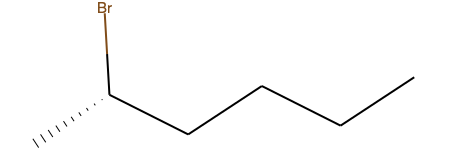

1 RDChiral outcomes: CCCC[C@H](C)Br


Reaction SMARTS: [C:1][C@@H:2]([CH3:3])[I:4]>>[C:1][C@@H:2]([CH3:3])Br


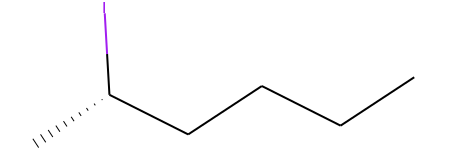

Input SMILES: CCCC[C@@H](I)C


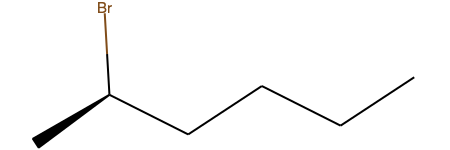

1 RDKit outcomes: CCCC[C@@H](C)Br


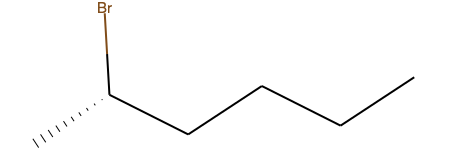

1 RDChiral outcomes: CCCC[C@H](C)Br


Reaction SMARTS: [C:1][C@H:2]([CH3:3])[I:4]>>[C:1][C@@H:2](Br)[CH3:3]


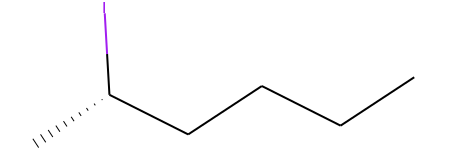

Input SMILES: CCCC[C@@H](I)C


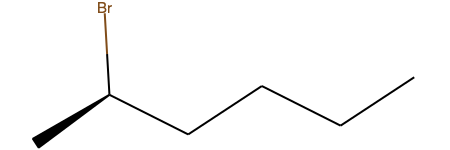

1 RDKit outcomes: CCCC[C@@H](C)Br


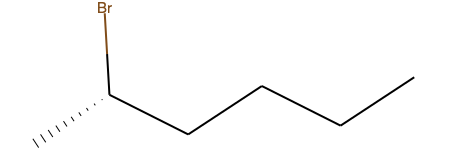

1 RDChiral outcomes: CCCC[C@H](C)Br


In [25]:
# SN2 with retention of a tetrahedral center
reaction_smarts = '[C:1][C@H:2]([CH3:3])[I:4]>>[C:1][C@H:2]([CH3:3])Br'
reactant_smiles = 'CCCC[C@@H](I)C'
show_outcomes(reaction_smarts, reactant_smiles)
sep_bar()
reaction_smarts = '[C:1][C@@H:2]([CH3:3])[I:4]>>[C:1][C@@H:2]([CH3:3])Br'
reactant_smiles = 'CCCC[C@@H](I)C'
show_outcomes(reaction_smarts, reactant_smiles)
sep_bar()
reaction_smarts = '[C:1][C@H:2]([CH3:3])[I:4]>>[C:1][C@@H:2](Br)[CH3:3]'
reactant_smiles = 'CCCC[C@@H](I)C'
show_outcomes(reaction_smarts, reactant_smiles)

#### ...that will be destroyed
In retro direction, this reaction is stereospecific

Reaction SMARTS: [C:1][C@H:2]([CH3:3])[I:4]>>[C:1][CH:2](Br)[CH3:3]


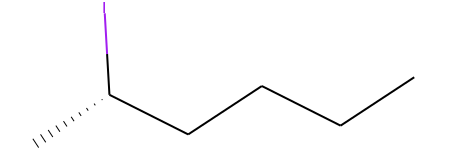

Input SMILES: CCCC[C@@H](I)C


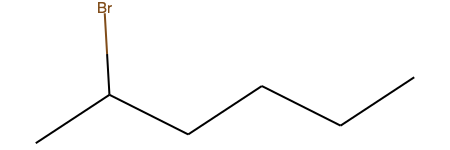

1 RDKit outcomes: CCCCC(C)Br


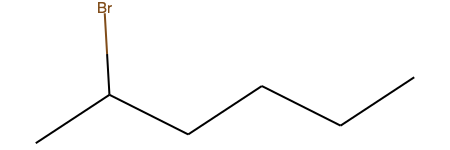

1 RDChiral outcomes: CCCCC(C)Br


In [26]:
reaction_smarts = '[C:1][C@H:2]([CH3:3])[I:4]>>[C:1][CH:2](Br)[CH3:3]'
reactant_smiles = 'CCCC[C@@H](I)C'
show_outcomes(reaction_smarts, reactant_smiles)

#### ....that will be introduced
In retro direction, this reaction produces a racemic product from a chiral precursor

Reaction SMARTS: [C:1][CH:2]([CH3:3])[I:4]>>[C:1][C@H:2](Br)[CH3:3]


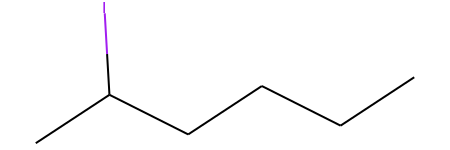

Input SMILES: CCCCC(I)C


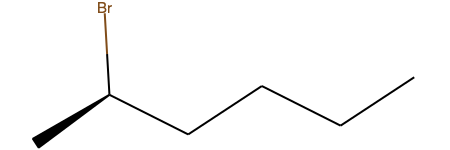

1 RDKit outcomes: CCCC[C@@H](C)Br


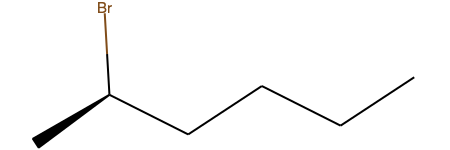

1 RDChiral outcomes: CCCC[C@@H](C)Br


Reaction SMARTS: [C:1][CH:2]([CH3:3])[I:4]>>[C:1][C@@H:2](Br)[CH3:3]


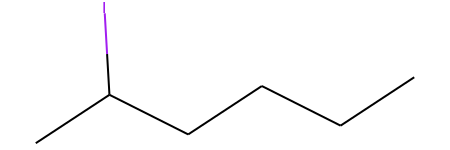

Input SMILES: CCCCC(I)C


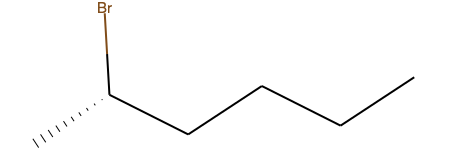

1 RDKit outcomes: CCCC[C@H](C)Br


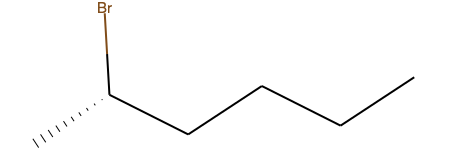

1 RDChiral outcomes: CCCC[C@H](C)Br


Reaction SMARTS: [C:1][CH:2]([CH3:3])[I:4]>>[C:1][C@H:2]([CH3:3])Br


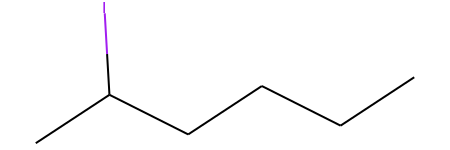

Input SMILES: CCCCC(I)C


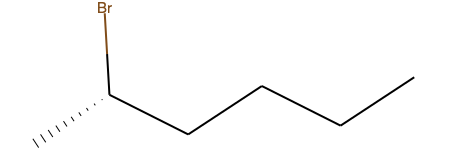

1 RDKit outcomes: CCCC[C@H](C)Br


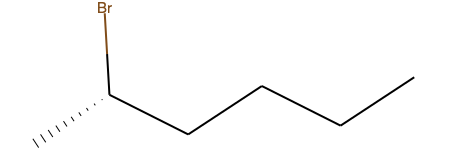

1 RDChiral outcomes: CCCC[C@H](C)Br


In [27]:
reaction_smarts = '[C:1][CH:2]([CH3:3])[I:4]>>[C:1][C@H:2](Br)[CH3:3]'
reactant_smiles = 'CCCCC(I)C'
show_outcomes(reaction_smarts, reactant_smiles)
sep_bar()
reaction_smarts = '[C:1][CH:2]([CH3:3])[I:4]>>[C:1][C@@H:2](Br)[CH3:3]'
reactant_smiles = 'CCCCC(I)C'
show_outcomes(reaction_smarts, reactant_smiles)
sep_bar()
reaction_smarts = '[C:1][CH:2]([CH3:3])[I:4]>>[C:1][C@H:2]([CH3:3])Br'
reactant_smiles = 'CCCCC(I)C'
show_outcomes(reaction_smarts, reactant_smiles)

Reaction SMARTS: [C:1][CH:2]([C:3])[I:4]>>[C:1][C@H:2]([C:3])Br


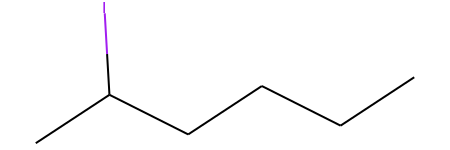

Input SMILES: CCCCC(I)C


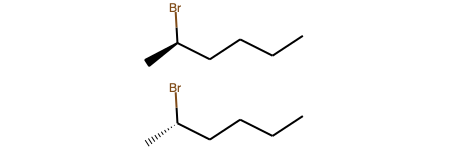

2 RDKit outcomes: CCCC[C@H](C)Br.CCCC[C@@H](C)Br


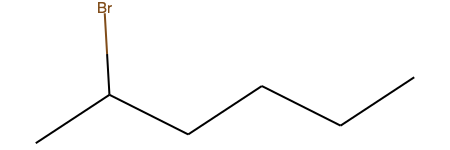

1 RDChiral outcomes: CCCCC(C)Br


In [28]:
# Chirality specified in precursor, but symmetry makes them equivalent
reaction_smarts = '[C:1][CH:2]([C:3])[I:4]>>[C:1][C@H:2]([C:3])Br'
reactant_smiles = 'CCCCC(I)C'
show_outcomes(reaction_smarts, reactant_smiles)

### Molecule needs two stereocenters, diastereoselective

Reaction SMARTS: [c:1]-[CH;@@;D3;+0:2]1-[O;H0;D2;+0]-[CH;@;D3;+0:3]-1-[c:4]>>[c:1]/[CH;D2;+0:2]=[CH;D2;+0:3]/[c:4]


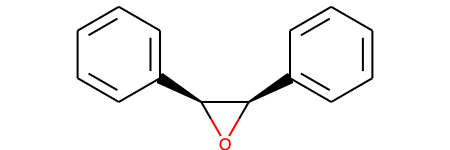

Input SMILES: c1ccccc1[C@H]2[C@H](O2)c1ccccc1


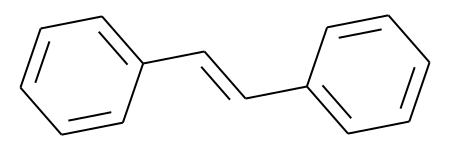

1 RDKit outcomes: C(=C/c1ccccc1)\c1ccccc1


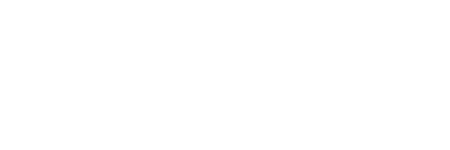

0 RDChiral outcomes: 


Reaction SMARTS: [c:1]-[CH;@@;D3;+0:2]1-[O;H0;D2;+0]-[CH;@;D3;+0:3]-1-[c:4]>>[c:1]/[CH;D2;+0:2]=[CH;D2;+0:3]/[c:4]


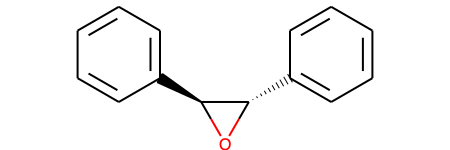

Input SMILES: c1ccccc1[C@H]2[C@@H](O2)c1ccccc1


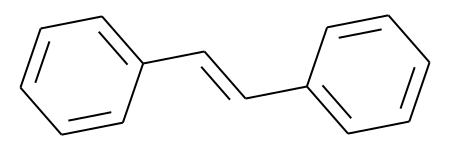

1 RDKit outcomes: C(=C/c1ccccc1)\c1ccccc1


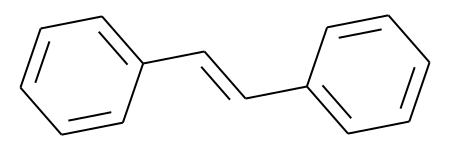

1 RDChiral outcomes: C(=C/c1ccccc1)\c1ccccc1


In [29]:
# preparing a trans epoxide from a trans alkene
reaction_smarts = '[c:1]-[CH;@@;D3;+0:2]1-[O;H0;D2;+0]-[CH;@;D3;+0:3]-1-[c:4]>>[c:1]/[CH;D2;+0:2]=[CH;D2;+0:3]/[c:4]'
reactant_smiles = 'c1ccccc1[C@H]2[C@H](O2)c1ccccc1' # cis epoxide, should not match
show_outcomes(reaction_smarts, reactant_smiles)
sep_bar()
reactant_smiles = 'c1ccccc1[C@H]2[C@@H](O2)c1ccccc1' # trans epoxide, should  match
show_outcomes(reaction_smarts, reactant_smiles)

Reaction SMARTS: [c:1]-[CH;@@;D3;+0:2]1-[O;H0;D2;+0]-[CH;@@;D3;+0:3]-1-[c:4]>>[c:1]/[CH;D2;+0:2]=[CH;D2;+0:3]\[c:4]


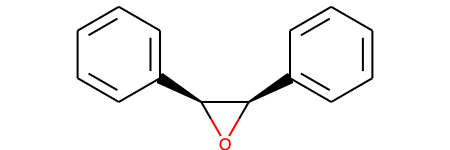

Input SMILES: c1ccccc1[C@H]2[C@H](O2)c1ccccc1


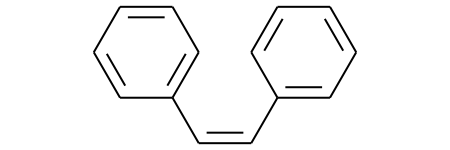

1 RDKit outcomes: C(=C\c1ccccc1)\c1ccccc1


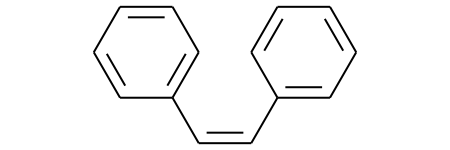

1 RDChiral outcomes: C(=C\c1ccccc1)\c1ccccc1


Reaction SMARTS: [c:1]-[CH;@@;D3;+0:2]1-[O;H0;D2;+0]-[CH;@@;D3;+0:3]-1-[c:4]>>[c:1]/[CH;D2;+0:2]=[CH;D2;+0:3]\[c:4]


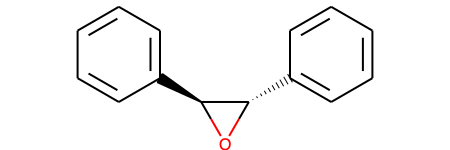

Input SMILES: c1ccccc1[C@H]2[C@@H](O2)c1ccccc1


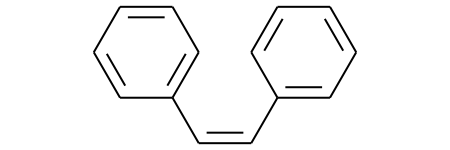

1 RDKit outcomes: C(=C\c1ccccc1)\c1ccccc1


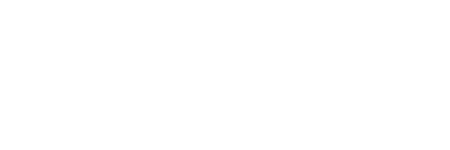

0 RDChiral outcomes: 


In [42]:
# preparing a cis epoxide from a cis alkene
reaction_smarts = '[c:1]-[CH;@@;D3;+0:2]1-[O;H0;D2;+0]-[CH;@@;D3;+0:3]-1-[c:4]>>[c:1]/[CH;D2;+0:2]=[CH;D2;+0:3]\[c:4]'
reactant_smiles = 'c1ccccc1[C@H]2[C@H](O2)c1ccccc1' # cis epoxide, should match
show_outcomes(reaction_smarts, reactant_smiles)
sep_bar()
reactant_smiles = 'c1ccccc1[C@H]2[C@@H](O2)c1ccccc1' # trans epoxide, should not match
show_outcomes(reaction_smarts, reactant_smiles)

Reaction SMARTS: [C:1](=[O:3])[O:2][C:4]>>[C:1](=[O:3])[OH:2].O[C:4]


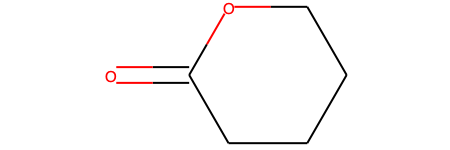

Input SMILES: C1C(=O)OCCC1


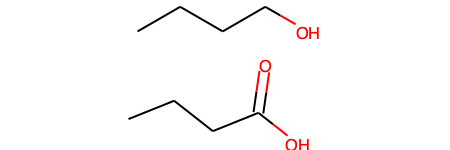

1 RDKit outcomes: CCCC(=O)O.CCCCO


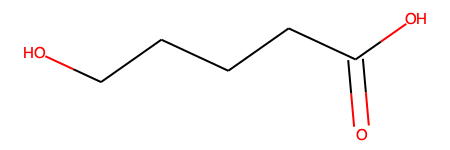

1 RDChiral outcomes: O=C(O)CCCCO


In [32]:
# Multiple prods?
# Intramolecular esterification (in forward direction)
reaction_smarts = '[C:1](=[O:3])[O:2][C:4]>>[C:1](=[O:3])[OH:2].O[C:4]'
reactant_smiles = 'C1C(=O)OCCC1'
show_outcomes(reaction_smarts, reactant_smiles)